In [1]:
# Logistic Regression Analysis - Part II
# Binary and multiclass classification with threshold tuning and probability interpretation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                           roc_curve, roc_auc_score, precision_recall_fscore_support)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


In [9]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
auc_score = roc_auc_score(y_test, y_proba)

print(f"Binary Classification Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {auc_score:.4f}")

Binary Classification Results:
Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1-Score: 0.9790
ROC-AUC: 0.9974


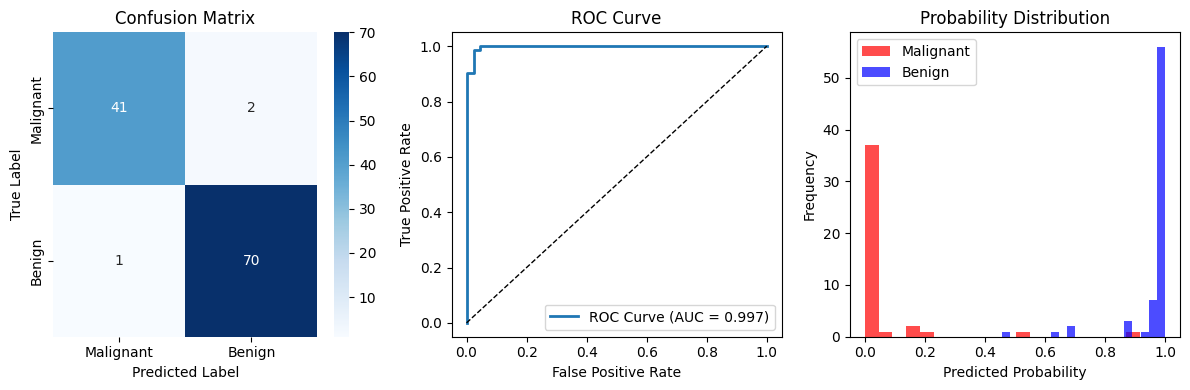

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'], 
            yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(y_proba[y_test == 0], bins=20, alpha=0.7, label='Malignant', color='red')
plt.hist(y_proba[y_test == 1], bins=20, alpha=0.7, label='Benign', color='blue')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# Task 6: Threshold Tuning and Probability Interpretation
thresholds_test = [0.3, 0.5, 0.7]
results = []

for threshold in thresholds_test:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    cm_thresh = confusion_matrix(y_test, y_pred_thresh)
    precision_thresh, recall_thresh, f1_thresh, _ = precision_recall_fscore_support(
        y_test, y_pred_thresh, average='binary')
    
    results.append({
        'Threshold': threshold,
        'Precision': precision_thresh,
        'Recall': recall_thresh,
        'F1-Score': f1_thresh,
        'Confusion_Matrix': cm_thresh
    })

print(f"\nThreshold Tuning Results:")
for result in results:
    print(f"Threshold {result['Threshold']}: Precision={result['Precision']:.3f}, "
          f"Recall={result['Recall']:.3f}, F1={result['F1-Score']:.3f}")



Threshold Tuning Results:
Threshold 0.3: Precision=0.973, Recall=1.000, F1=0.986
Threshold 0.5: Precision=0.972, Recall=0.986, F1=0.979
Threshold 0.7: Precision=0.985, Recall=0.944, F1=0.964


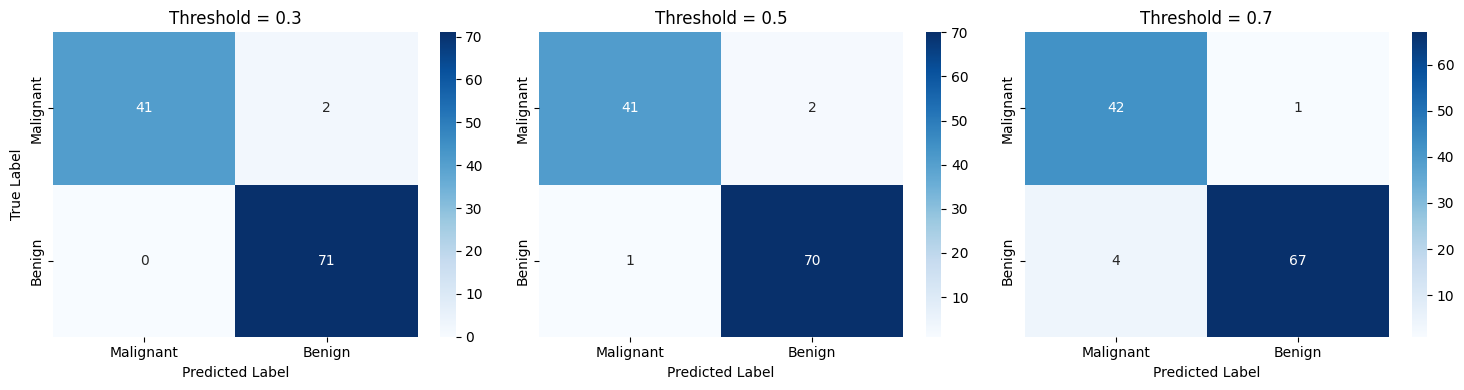

In [12]:
plt.figure(figsize=(15, 4))
for i, result in enumerate(results):
    plt.subplot(1, 3, i+1)
    sns.heatmap(result['Confusion_Matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Malignant', 'Benign'], 
                yticklabels=['Malignant', 'Benign'])
    plt.title(f'Threshold = {result["Threshold"]}')
    plt.ylabel('True Label' if i == 0 else '')
    plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

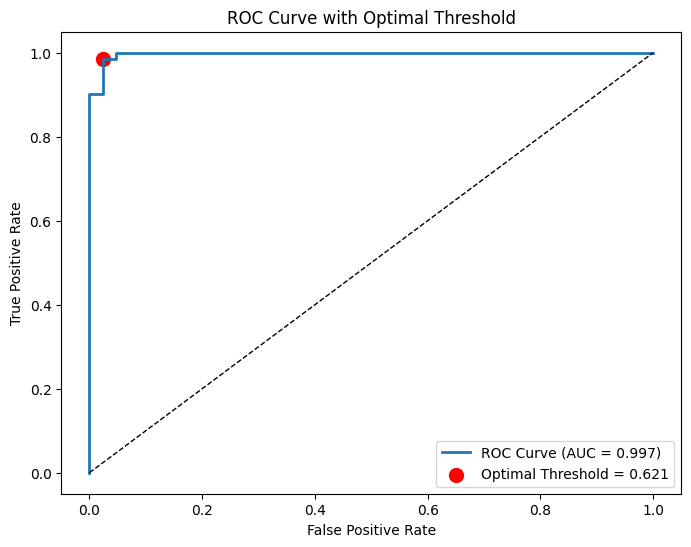

Optimal threshold from ROC curve: 0.621


In [13]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', s=100, 
            label=f'Optimal Threshold = {optimal_threshold:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend()
plt.show()

print(f"Optimal threshold from ROC curve: {optimal_threshold:.3f}")

In [14]:
# Task 7: Multiclass Classification (Optional)
iris_data = load_iris()
X_iris = iris_data.data
y_iris = iris_data.target

In [15]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42)

scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)


In [16]:
model_ovr = LogisticRegression(multi_class='ovr', random_state=42, max_iter=1000)
model_ovr.fit(X_train_iris_scaled, y_train_iris)
y_pred_ovr = model_ovr.predict(X_test_iris_scaled)

model_multi = LogisticRegression(multi_class='multinomial', random_state=42, max_iter=1000)
model_multi.fit(X_train_iris_scaled, y_train_iris)
y_pred_multi = model_multi.predict(X_test_iris_scaled)

c:\Users\omdut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\omdut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [18]:
accuracy_ovr = accuracy_score(y_test_iris, y_pred_ovr)
accuracy_multi = accuracy_score(y_test_iris, y_pred_multi)

print(f"\nMulticlass Classification Results:")
print(f"One-vs-Rest Accuracy: {accuracy_ovr:.4f}")
print(f"Multinomial Accuracy: {accuracy_multi:.4f}")

print(f"\nClassification Report (One-vs-Rest):")
print(classification_report(y_test_iris, y_pred_ovr, 
                          target_names=iris_data.target_names))


Multiclass Classification Results:
One-vs-Rest Accuracy: 0.9667
Multinomial Accuracy: 1.0000

Classification Report (One-vs-Rest):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



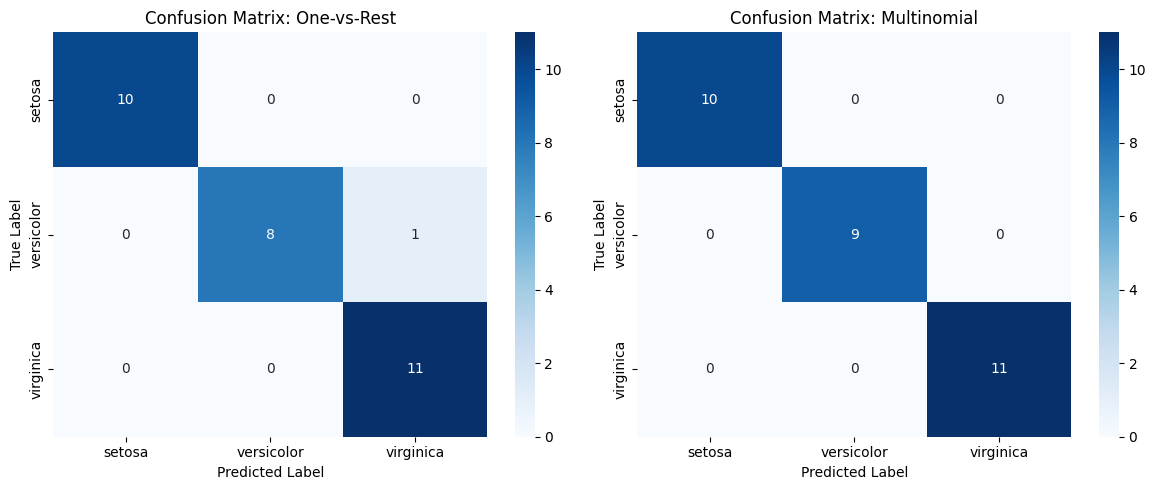

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_ovr = confusion_matrix(y_test_iris, y_pred_ovr)
sns.heatmap(cm_ovr, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris_data.target_names,
            yticklabels=iris_data.target_names)
plt.title('Confusion Matrix: One-vs-Rest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.subplot(1, 2, 2)
cm_multi = confusion_matrix(y_test_iris, y_pred_multi)
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris_data.target_names,
            yticklabels=iris_data.target_names)
plt.title('Confusion Matrix: Multinomial')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

In [20]:
y_proba_iris = model_multi.predict_proba(X_test_iris_scaled)
print(f"\nSample Probability Predictions:")
for i in range(5):
    print(f"Sample {i+1}: Predicted={iris_data.target_names[y_pred_multi[i]]}, "
          f"Probabilities={y_proba_iris[i]}")

feature_importance = pd.DataFrame({
    'Feature': iris_data.feature_names,
    'Setosa_Coef': model_multi.coef_[0],
    'Versicolor_Coef': model_multi.coef_[1],
    'Virginica_Coef': model_multi.coef_[2]
})

print(f"\nMultinomial Logistic Regression Coefficients:")
print(feature_importance)


Sample Probability Predictions:
Sample 1: Predicted=versicolor, Probabilities=[0.0114572  0.87597853 0.11256428]
Sample 2: Predicted=setosa, Probabilities=[9.64411302e-01 3.55882864e-02 4.11287569e-07]
Sample 3: Predicted=virginica, Probabilities=[3.77322994e-08 2.88231142e-03 9.97117651e-01]
Sample 4: Predicted=versicolor, Probabilities=[0.01320932 0.75939916 0.22739152]
Sample 5: Predicted=versicolor, Probabilities=[0.00188856 0.75213576 0.24597568]

Multinomial Logistic Regression Coefficients:
             Feature  Setosa_Coef  Versicolor_Coef  Virginica_Coef
0  sepal length (cm)    -1.003166         0.527990        0.475175
1   sepal width (cm)     1.144873        -0.283200       -0.861673
2  petal length (cm)    -1.811348        -0.340607        2.151955
3   petal width (cm)    -1.692510        -0.720140        2.412650
